In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git

!pip install keras-self-attention

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-g1df515d
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-g1df515d
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import svm
import tensorflow as tf
import os
import time
import keras
import keras.backend as K

import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv1D
from keras.models import Model
from keras.utils import plot_model

import timeit
from keras.layers import MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras_self_attention import SeqSelfAttention
from keras.layers import (Input, Embedding, Conv1D, Activation, GlobalMaxPooling1D, BatchNormalization,
                          Concatenate, LSTM, Flatten, Dropout, Dense)

In [ ]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
np.load = np_load_old

In [ ]:
with open('/content/drive/MyDrive/data_training/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_training/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)


X = normalize(X)
Z = np.ravel(Y[:, [2]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Dominance_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

for i in range(len(Z)):
  if Z[i] == 9:
    Z[i] = 8.99

In [ ]:
A=np.copy(Z)

np.unique(Z)

array([1.  , 1.01, 1.03, 1.04, 1.05, 1.06, 1.09, 1.1 , 1.12, 1.15, 1.18,
       1.22, 1.24, 1.26, 1.33, 1.37, 1.42, 1.44, 1.5 , 1.55, 1.73, 1.77,
       1.79, 1.82, 1.83, 1.85, 1.86, 1.87, 1.88, 1.9 , 1.91, 1.92, 1.94,
       1.95, 1.96, 1.97, 1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06, 2.08,
       2.09, 2.1 , 2.12, 2.13, 2.15, 2.18, 2.23, 2.24, 2.26, 2.28, 2.33,
       2.35, 2.36, 2.4 , 2.47, 2.53, 2.54, 2.58, 2.62, 2.73, 2.74, 2.76,
       2.78, 2.79, 2.81, 2.82, 2.86, 2.87, 2.88, 2.9 , 2.91, 2.92, 2.94,
       2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04, 3.05, 3.06, 3.08,
       3.12, 3.13, 3.15, 3.17, 3.18, 3.22, 3.23, 3.27, 3.29, 3.35, 3.37,
       3.4 , 3.47, 3.49, 3.51, 3.54, 3.55, 3.58, 3.67, 3.69, 3.71, 3.73,
       3.74, 3.77, 3.78, 3.81, 3.83, 3.86, 3.87, 3.88, 3.9 , 3.92, 3.94,
       3.95, 3.96, 3.97, 3.99, 4.  , 4.01, 4.03, 4.04, 4.05, 4.06, 4.08,
       4.09, 4.1 , 4.12, 4.13, 4.14, 4.19, 4.21, 4.22, 4.29, 4.31, 4.36,
       4.42, 4.45, 4.46, 4.51, 4.55, 4.59, 4.62, 4.

In [ ]:
# Dominance classes
negative = 0
neutral = 0
positive = 0
for i in range(len(A)):
  if A[i] >= 1 and A[i]<=2.99:
    A [i] = 1
    negative = negative + 1
  if A[i] >= 3 and A[i]<=5.99:
    A [i] = 2
    neutral = neutral + 1
  if A[i] >= 6 and A[i]<=8.99:
    A [i] = 3
    positive = positive + 1

print(negative,neutral, positive)

93310 130802 275600


In [ ]:
x_train = np.array(X[:])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(A)
y_train = y_train[:,1:]
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
with open('/content/drive/MyDrive/data_validation/data_validation.npy', 'rb') as fileTrain:
    P  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_validation/label_validation.npy', 'rb') as fileTrainL:
    Q  = np.load(fileTrainL)

P = normalize(P)
R = np.ravel(Q[:, [2]])

Arousal_val = np.ravel(Q[:, [0]])
Valence_val = np.ravel(Q[:, [1]])
Domain_val = np.ravel(Q[:, [2]])
Like_val = np.ravel(Q[:, [3]])

for i in range(len(R)):
  if R[i] == 9:
    R[i] = 8.99

In [ ]:
B=np.copy(R)

np.unique(R)

array([1.  , 1.01, 1.03, 1.04, 1.05, 1.06, 1.09, 1.1 , 1.12, 1.15, 1.18,
       1.22, 1.24, 1.26, 1.33, 1.37, 1.42, 1.44, 1.5 , 1.55, 1.73, 1.77,
       1.79, 1.82, 1.83, 1.85, 1.86, 1.87, 1.88, 1.9 , 1.91, 1.92, 1.94,
       1.95, 1.96, 1.97, 1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06, 2.08,
       2.09, 2.1 , 2.12, 2.13, 2.15, 2.18, 2.23, 2.24, 2.26, 2.28, 2.33,
       2.35, 2.36, 2.4 , 2.47, 2.53, 2.54, 2.58, 2.62, 2.73, 2.74, 2.76,
       2.78, 2.79, 2.81, 2.82, 2.86, 2.87, 2.88, 2.9 , 2.91, 2.92, 2.94,
       2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04, 3.05, 3.06, 3.08,
       3.12, 3.13, 3.15, 3.17, 3.18, 3.22, 3.23, 3.27, 3.29, 3.35, 3.37,
       3.4 , 3.47, 3.49, 3.51, 3.54, 3.55, 3.58, 3.67, 3.69, 3.71, 3.73,
       3.74, 3.77, 3.78, 3.81, 3.83, 3.86, 3.87, 3.88, 3.9 , 3.92, 3.94,
       3.95, 3.96, 3.97, 3.99, 4.  , 4.01, 4.03, 4.04, 4.05, 4.06, 4.08,
       4.09, 4.1 , 4.12, 4.13, 4.14, 4.19, 4.21, 4.22, 4.29, 4.31, 4.36,
       4.42, 4.45, 4.46, 4.51, 4.55, 4.59, 4.62, 4.

In [ ]:
# liking_val classes
negative_val = 0
neutral_val = 0
positive_val = 0
for i in range(len(B)):
  if B[i] >= 1 and B[i]<=2.99:
    B [i] = 1
    negative_val = negative_val + 1
  if B[i] >= 3 and B[i]<=5.99:
    B [i] = 2
    neutral_val = neutral_val + 1
  if B[i] >= 6 and B[i]<=8.99:
    B [i] = 3
    positive_val = positive_val + 1

print(negative_val,neutral_val, positive_val)

11661 16339 34464


In [ ]:
x_val = np.array(P[:])

In [ ]:
from keras.utils import to_categorical
y_val = to_categorical(B)
y_val = y_val[:,1:]
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
with open('/content/drive/MyDrive/data_testing/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_testing/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [2]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Dominance_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

for i in range(len(L)):
  if L[i] == 9:
    L[i] = 8.99

In [ ]:
C=np.copy(L)

np.unique(L)

array([1.  , 1.01, 1.03, 1.04, 1.05, 1.06, 1.09, 1.1 , 1.12, 1.15, 1.18,
       1.22, 1.24, 1.26, 1.33, 1.37, 1.42, 1.44, 1.5 , 1.55, 1.73, 1.77,
       1.79, 1.82, 1.83, 1.85, 1.86, 1.87, 1.88, 1.9 , 1.91, 1.92, 1.94,
       1.95, 1.96, 1.97, 1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06, 2.08,
       2.09, 2.1 , 2.12, 2.13, 2.15, 2.18, 2.23, 2.24, 2.26, 2.28, 2.33,
       2.35, 2.36, 2.4 , 2.47, 2.53, 2.54, 2.58, 2.62, 2.73, 2.74, 2.76,
       2.78, 2.79, 2.81, 2.82, 2.86, 2.87, 2.88, 2.9 , 2.91, 2.92, 2.94,
       2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04, 3.05, 3.06, 3.08,
       3.12, 3.13, 3.15, 3.17, 3.18, 3.22, 3.23, 3.27, 3.29, 3.35, 3.37,
       3.4 , 3.47, 3.49, 3.51, 3.54, 3.55, 3.58, 3.67, 3.69, 3.71, 3.73,
       3.74, 3.77, 3.78, 3.81, 3.83, 3.86, 3.87, 3.88, 3.9 , 3.92, 3.94,
       3.95, 3.96, 3.97, 3.99, 4.  , 4.01, 4.03, 4.04, 4.05, 4.06, 4.08,
       4.09, 4.1 , 4.12, 4.13, 4.14, 4.19, 4.21, 4.22, 4.29, 4.31, 4.36,
       4.42, 4.45, 4.46, 4.51, 4.55, 4.59, 4.62, 4.

In [ ]:
# liking_test classes
negative_test = 0
neutral_test = 0
positive_test = 0
for i in range(len(C)):
  if C[i] >= 1 and C[i]<=2.99:
    C [i] = 1
    negative_test = negative_test + 1
  if C[i] >= 3 and C[i]<=5.99:
    C [i] = 2
    neutral_test = neutral_test + 1
  if C[i] >= 6 and C[i]<=8.99:
    C [i] = 3
    positive_test = positive_test + 1

print(negative_test,neutral_test, positive_test)

11661 16339 34464


In [ ]:
x_test = np.array(M[:])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(C)
y_test = y_test[:,1:]
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(499712, 3)
(62464, 3)
(62464, 3)


In [ ]:
batch_size = 256
num_classes = 3
epochs = 10
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(75, 1)


In [ ]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight=sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight=sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [ ]:
model_HB = Sequential()

intput_shape=(x_train.shape[1], 1)

model_HB.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))


model_HB.add(LSTM(units=64,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=128,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=128,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=256,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))

model_HB.add(Flatten())

model_HB.add(Dense(1024, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(256, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(64, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(num_classes, activation='softmax'))

model_HB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 75, 1024)          10240     
                                                                 
 batch_normalization_4 (Bat  (None, 75, 1024)          4096      
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 37, 1024)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 512)           3146240   
                                                                 
 batch_normalization_5 (Bat  (None, 37, 512)           2048      
 chNormalization)                                                
                                                      

In [ ]:
model_HB.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

In [ ]:
model_name = "FHybrid_model"
directory_path = "/content/drive/MyDrive/Thesis"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model.hdf5


In [ ]:
FHybridmodel = model_HB.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/10
1952/1952 [==============================] - ETA: 0s - loss: 0.8268 - accuracy: 0.6054 - precision: 0.6582 - f1_score: 0.5617
Epoch 1: val_accuracy improved from -inf to 0.65409, saving model to /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 203s 91ms/step - loss: 0.8268 - accuracy: 0.6054 - precision: 0.6582 - f1_score: 0.5617 - val_loss: 0.7420 - val_accuracy: 0.6541 - val_precision: 0.6901 - val_f1_score: 0.6382 - lr: 0.0010
Epoch 2/10
1952/1952 [==============================] - ETA: 0s - loss: 0.6823 - accuracy: 0.6863 - precision: 0.7310 - f1_score: 0.6682
Epoch 2: val_accuracy improved from 0.65409 to 0.71233, saving model to /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 180s 92ms/step - loss: 0.6823 - accuracy: 0.6863 - precision: 0.7310 - f1_score: 0.6682 - val_loss: 0.6294 - val_accuracy: 0.7123 - val_precision: 0.7506 - val_f1_scor

In [ ]:
score_Hybrid = model_HB.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_Hybrid[0])
print('Test accuracy:', score_Hybrid[1])
print('Test precision:', score_Hybrid[2])
print('Test f1_score:', score_Hybrid[3])

1952/1952 [==============================] - 16s 8ms/step - loss: 0.3453 - accuracy: 0.8724 - precision: 0.8812 - f1_score: 0.8726
Test loss: 0.34534940123558044
Test accuracy: 0.8723905086517334
Test precision: 0.8811739087104797
Test f1_score: 0.8726420402526855


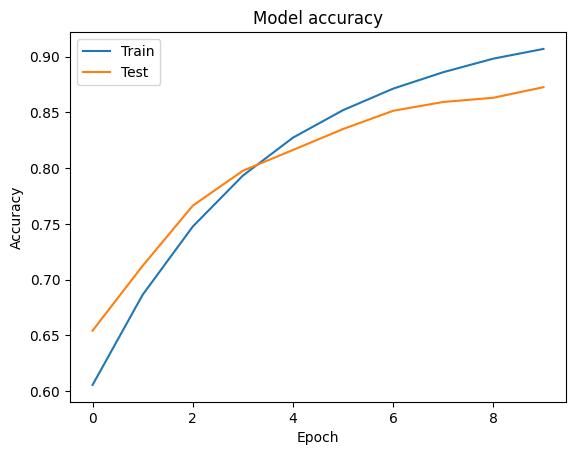

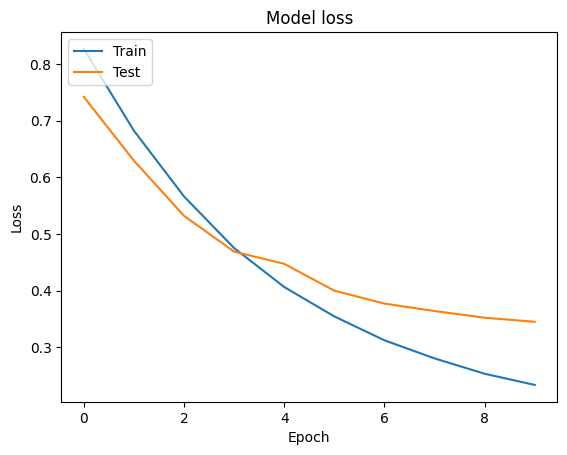

In [ ]:
# Plot training & validation accuracy values
plt.plot(FHybridmodel.history['accuracy'])
plt.plot(FHybridmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FHybridmodel.history['loss'])
plt.plot(FHybridmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 15s 7ms/step


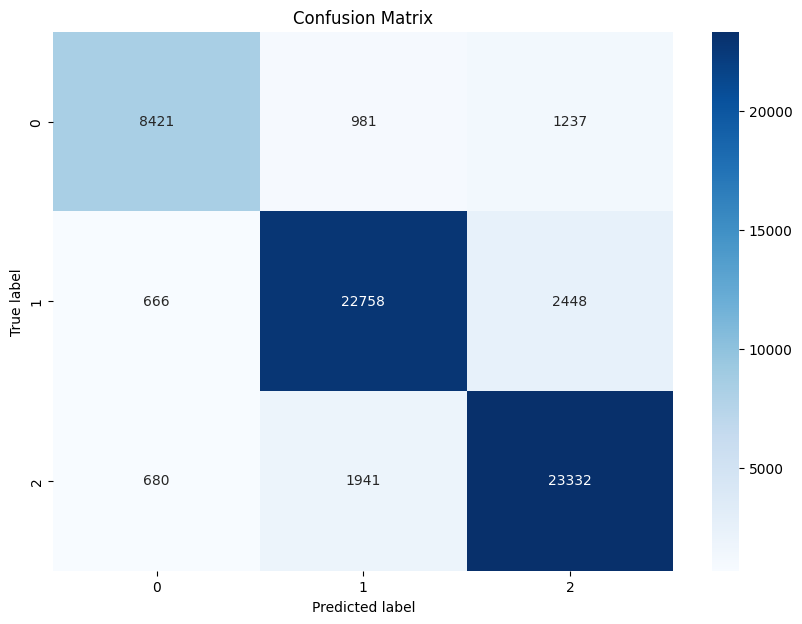

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(model_HB.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_87"

path_model_HB = base_path_model + model_name + accuracy + ".h5"
model_HB.save(path_model_HB)
print(path_model_HB)

/content/drive/MyDrive/Thesis/FHybrid_model_87.h5


FOR LIKING


In [ ]:
model_name = "FHybrid_model_liking"
directory_path = "/content/drive/MyDrive/Thesis"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model_liking.hdf5


In [ ]:
FHybridmodel_liking = model_HB.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/10
1952/1952 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.6141 - precision_2: 0.6768 - f1_score: 0.5683
Epoch 1: val_accuracy improved from -inf to 0.65342, saving model to /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model_liking.hdf5
1952/1952 [==============================] - 193s 91ms/step - loss: 0.8047 - accuracy: 0.6141 - precision_2: 0.6768 - f1_score: 0.5683 - val_loss: 0.7290 - val_accuracy: 0.6534 - val_precision_2: 0.7032 - val_f1_score: 0.6302 - lr: 0.0010
Epoch 2/10
1952/1952 [==============================] - ETA: 0s - loss: 0.6733 - accuracy: 0.6881 - precision_2: 0.7366 - f1_score: 0.6670
Epoch 2: val_accuracy improved from 0.65342 to 0.71350, saving model to /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model_liking.hdf5
1952/1952 [==============================] - 178s 91ms/step - loss: 0.6733 - accuracy: 0.6881 - precision_2: 0.7366 - f1_score: 0.6670 - val_loss: 0.6237 - val_accuracy: 0.7135 - val_precisi

In [ ]:
score_Hybrid = model_HB.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_Hybrid[0])
print('Test accuracy:', score_Hybrid[1])
print('Test precision:', score_Hybrid[2])
print('Test f1_score:', score_Hybrid[3])

In [ ]:
# Plot training & validation accuracy values
plt.plot(FHybridmodel_liking.history['accuracy'])
plt.plot(FHybridmodel_liking.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FHybridmodel_liking.history['loss'])
plt.plot(FHybridmodel_liking.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(model_HB.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_"

path_model_HB = base_path_model + model_name + accuracy + ".h5"
model_HB.save(path_model_HB)
print(path_model_HB)